0.5838852650310812
          0        1         2        3         4         5         6       7  \
0 -0.477077 -0.04431 -0.902163 -0.50102 -1.161971  0.167993  0.493877  0.1689   
1 -0.477077 -0.04431 -0.902163 -0.50102 -1.161971  0.167993  0.493877  0.1689   
2 -0.477077 -0.04431 -0.902163 -0.50102 -1.161971  0.167993  0.493877  0.1689   
3 -0.477077 -0.04431 -0.902163 -0.50102 -1.161971  0.167993  0.493877  0.1689   
4 -0.477077 -0.04431 -0.902163 -0.50102 -1.161971  0.167993  0.493877  0.1689   

          8         9        10        11        12        13        14  \
0  0.677208 -0.942352 -0.563324  0.128051  0.483502  0.579384 -1.190274   
1  0.677208 -0.942352 -0.563324  0.128051  0.483502  0.579384 -1.190274   
2  0.677208 -0.942352 -0.563324  0.128051  0.483502  0.579384 -1.190274   
3  0.677208 -0.942352 -0.563324  0.128051  0.483502  0.579384 -1.190274   
4  0.677208 -0.942352 -0.563324  0.128051  0.483502  0.579384 -1.190274   

         15  
0 -0.589656  
1 -0.589656  
2

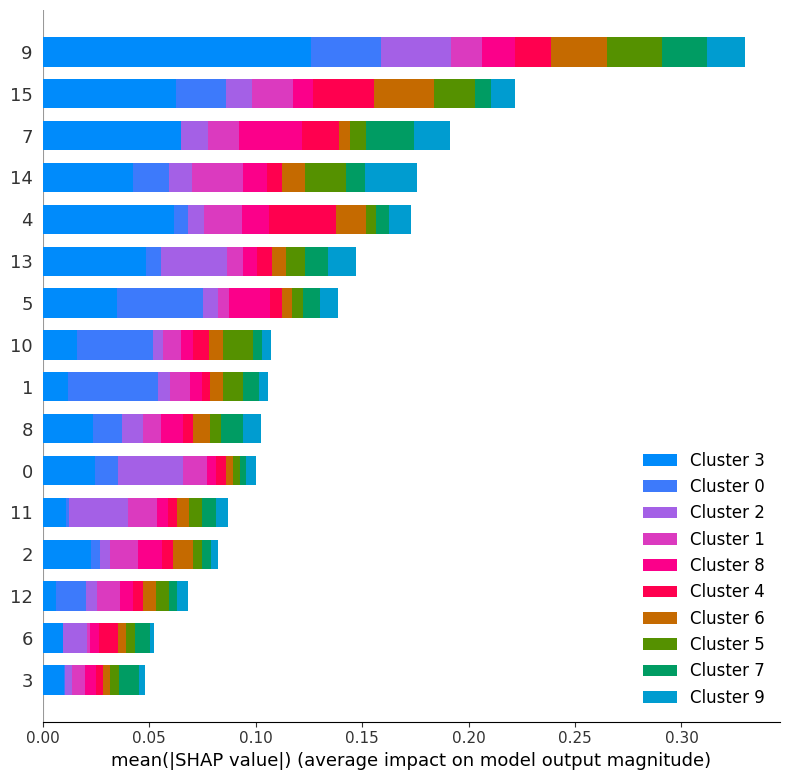

In [1]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt

### Initial HC
data_DDR = '/kaggle/input/new-gae/GAE-128-8-new.csv'
df_ddr = pd.read_csv(data_DDR)
y = df_ddr['Unnamed: 0']
X_ddr_aglo = df_ddr.drop('Unnamed: 0',axis=1)
clustering = AgglomerativeClustering(n_clusters=10,
                                     metric="euclidean",
                                     linkage="ward")
cluster_labels = clustering.fit(X_ddr_aglo)
print(metrics.silhouette_score(X_ddr_aglo,clustering.labels_, metric='euclidean'))
#print(cluster_labels.labels_)
print((pd.DataFrame(X_ddr_aglo)).head())
### SHAP
X_scaled = StandardScaler().fit_transform(X_ddr_aglo)
surrogate_model = RandomForestClassifier(n_estimators=100,random_state=42)
surrogate_model.fit(X_scaled,cluster_labels.labels_)
explainer = shap.TreeExplainer(surrogate_model)
shap_values = explainer.shap_values(X_scaled)
shap.summary_plot(shap_values,X_scaled,feature_names=X_ddr_aglo.columns,class_names=[f"Cluster {i}" for i in range(10)], show=False)
plt.tight_layout()
plt.show()


In [3]:
X_ddr_aglo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.477077,-0.044310,-0.902163,-0.501020,-1.161971,0.167993,0.493877,0.168900,0.677208,-0.942352,-0.563324,0.128051,0.483502,0.579384,-1.190274,-0.589656
1,-0.477077,-0.044310,-0.902163,-0.501020,-1.161971,0.167993,0.493877,0.168900,0.677208,-0.942352,-0.563324,0.128051,0.483502,0.579384,-1.190274,-0.589656
2,-0.477077,-0.044310,-0.902163,-0.501020,-1.161971,0.167993,0.493877,0.168900,0.677208,-0.942352,-0.563324,0.128051,0.483502,0.579384,-1.190274,-0.589656
3,-0.477077,-0.044310,-0.902163,-0.501020,-1.161971,0.167993,0.493877,0.168900,0.677208,-0.942352,-0.563324,0.128051,0.483502,0.579384,-1.190274,-0.589656
4,-0.477077,-0.044310,-0.902163,-0.501020,-1.161971,0.167993,0.493877,0.168900,0.677208,-0.942352,-0.563324,0.128051,0.483502,0.579384,-1.190274,-0.589656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.128696,0.348216,-0.019902,0.183412,0.245849,-0.060237,-0.008858,-0.051228,-0.127327,0.458081,0.042721,0.377650,0.372095,-0.045974,-0.089505,0.138541
434,-0.618598,0.171712,0.442294,-0.040787,0.142013,-0.053793,-0.070386,-0.009122,-0.050705,0.285531,-0.283341,0.191158,0.085090,0.004719,-0.205326,0.128498
435,-0.330489,0.187616,0.344016,0.034484,-0.003277,-0.214698,0.127232,-0.101399,-0.111792,0.322727,-0.132784,0.248723,0.094172,0.118440,-0.343118,-0.105007
436,-0.196162,0.326522,0.085437,-0.056298,0.097162,0.035530,-0.144065,-0.250812,0.028026,0.607278,-0.067608,0.141734,-0.180099,0.003569,-0.733585,-0.388248


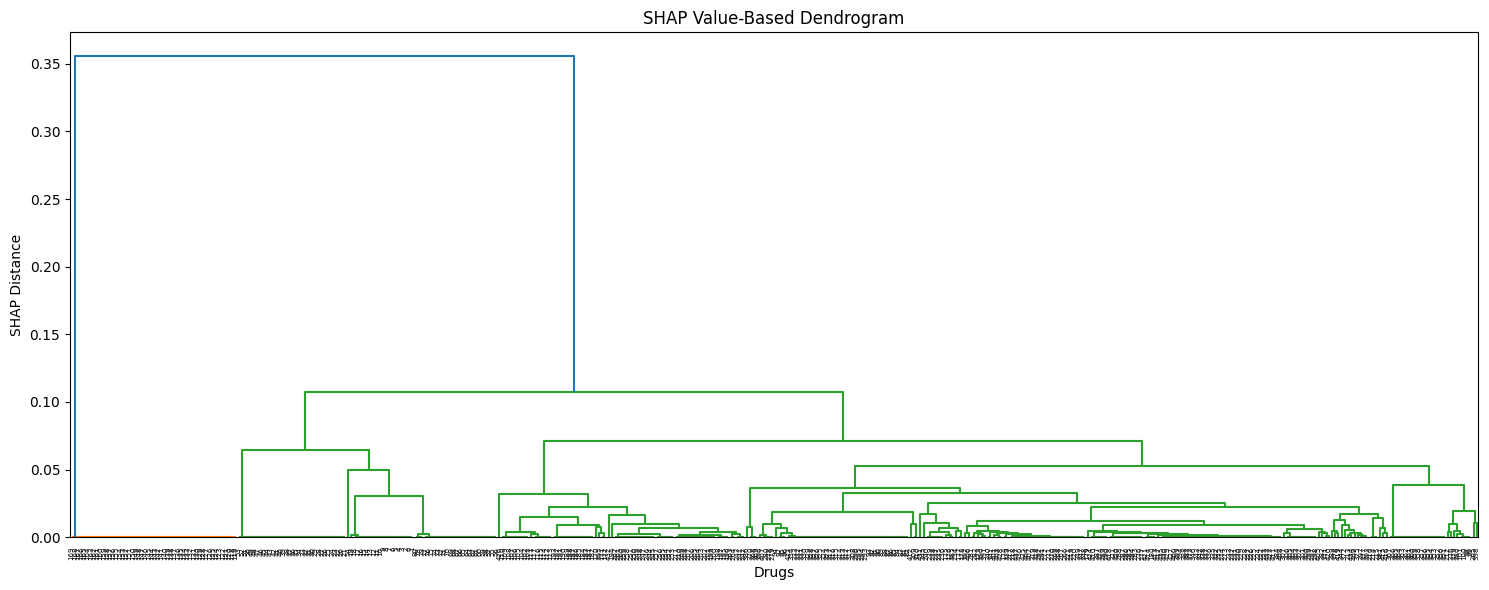

In [4]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
shap_dist = pdist(shap_values[0], 'euclidean')  
shap_linkage = sch.linkage(shap_dist, method='complete')

plt.figure(figsize=(15, 6))
sch.dendrogram(shap_linkage, labels=X_ddr_aglo.index, orientation='top')
plt.title("SHAP Value-Based Dendrogram")
plt.xlabel('Drugs')
plt.ylabel('SHAP Distance')
plt.tight_layout()
plt.show()


Number of samples in each cluster:
Cluster 0: 52 samples
Cluster 1: 35 samples
Cluster 2: 32 samples
Cluster 3: 189 samples
Cluster 4: 23 samples
Cluster 5: 26 samples
Cluster 6: 20 samples
Cluster 7: 18 samples
Cluster 8: 25 samples
Cluster 9: 18 samples


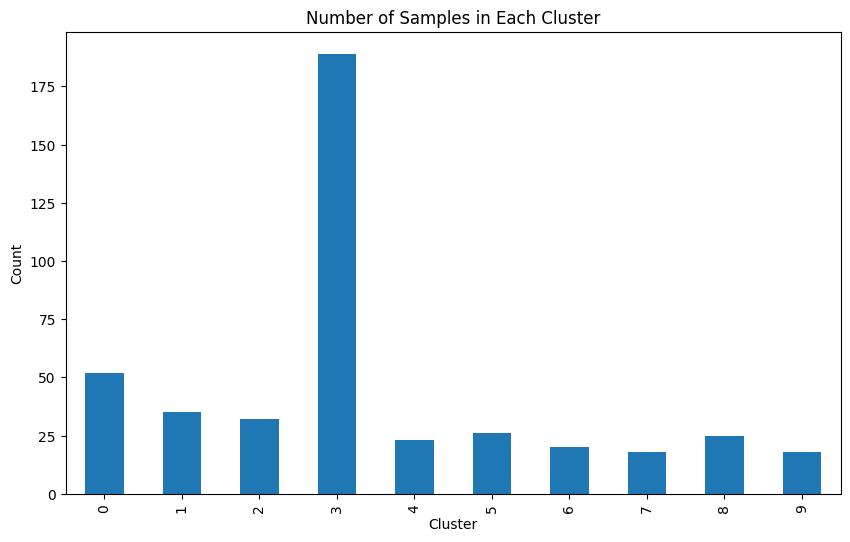

In [4]:
# Count samples in each cluster
cluster_counts = pd.Series(clustering.labels_).value_counts().sort_index()
print("Number of samples in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} samples")

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


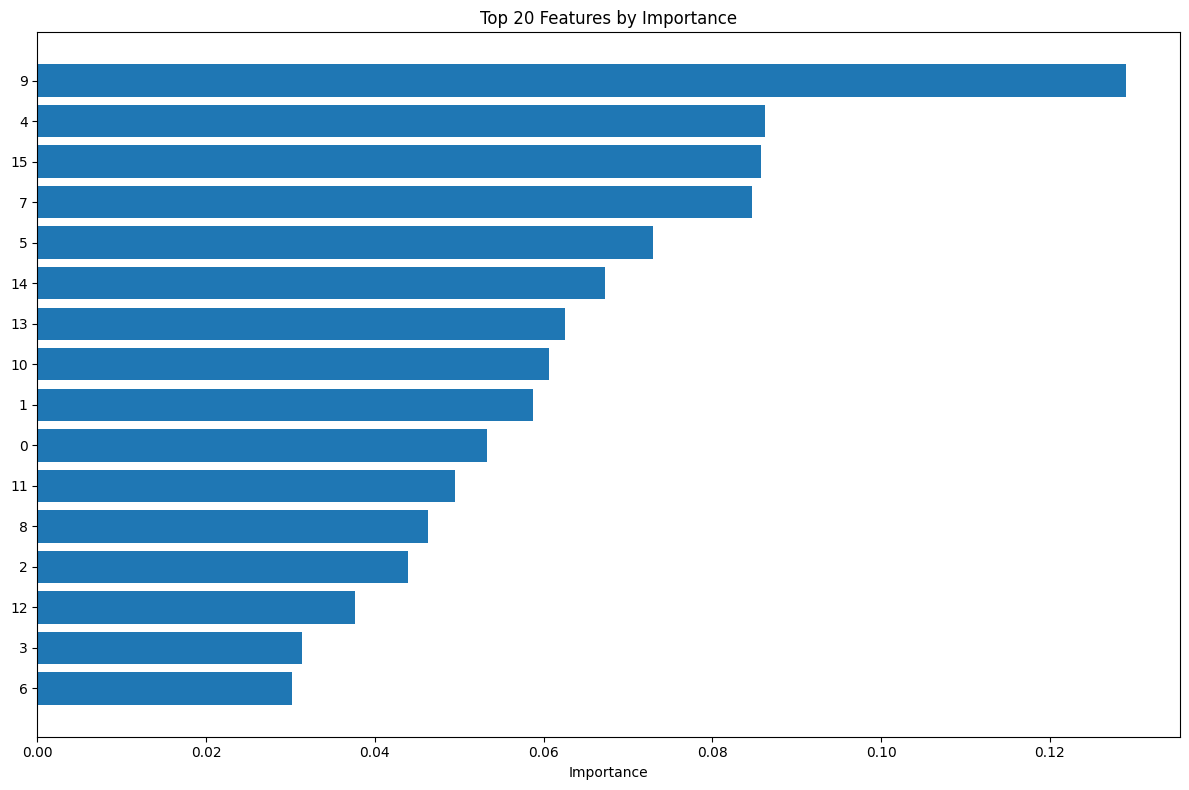

In [5]:
# Get feature importance from the surrogate model
importances = surrogate_model.feature_importances_
feature_names = X_ddr_aglo.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


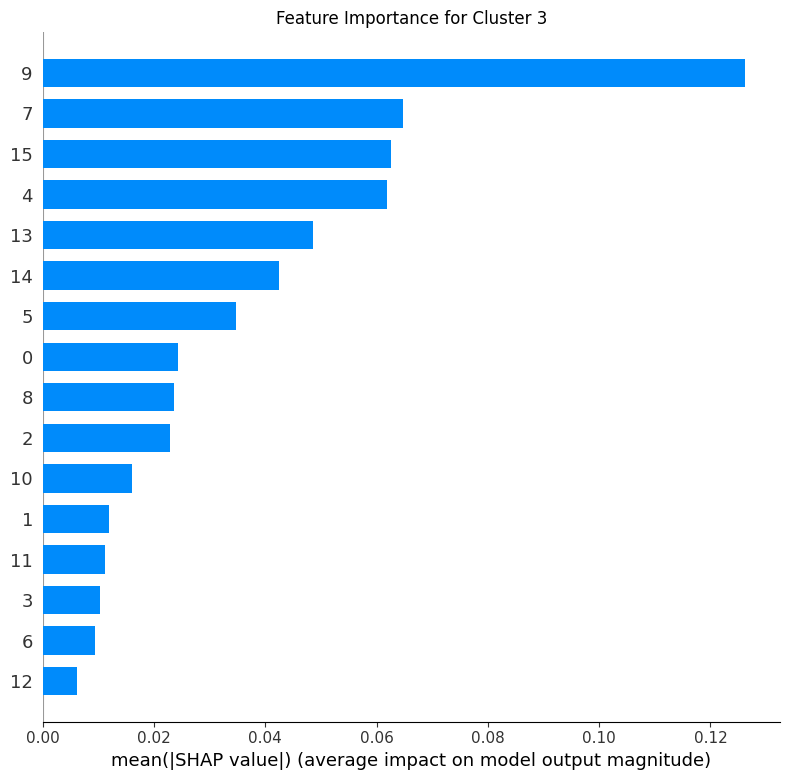

In [7]:
import numpy as np
# Analyze SHAP values for a specific cluster
cluster_to_analyze = 3  # Change to analyze different clusters (0-9)

# Get indices of samples in the chosen cluster
cluster_indices = np.where(clustering.labels_ == cluster_to_analyze)[0]

# Plot SHAP values for this cluster
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[cluster_to_analyze], 
    X_scaled[cluster_indices], 
    feature_names=X_ddr_aglo.columns,
    plot_type="bar",
    show=False
)
plt.title(f'Feature Importance for Cluster {cluster_to_analyze}')
plt.tight_layout()
plt.show()


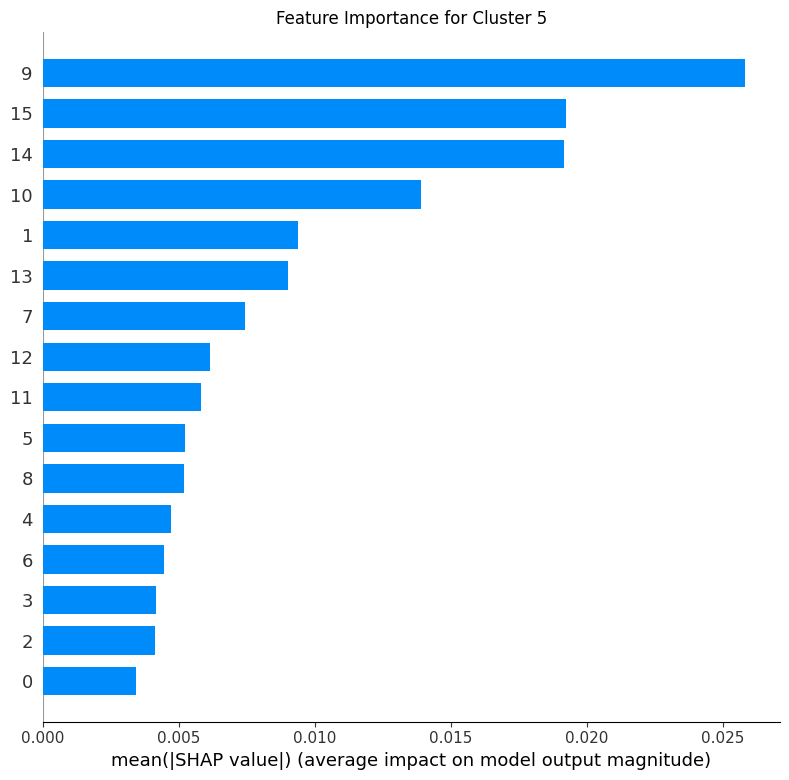

In [8]:
import numpy as np
# Analyze SHAP values for a specific cluster
cluster_to_analyze = 5  # Change to analyze different clusters (0-9)

# Get indices of samples in the chosen cluster
cluster_indices = np.where(clustering.labels_ == cluster_to_analyze)[0]

# Plot SHAP values for this cluster
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values[cluster_to_analyze], 
    X_scaled[cluster_indices], 
    feature_names=X_ddr_aglo.columns,
    plot_type="bar",
    show=False
)
plt.title(f'Feature Importance for Cluster {cluster_to_analyze}')
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

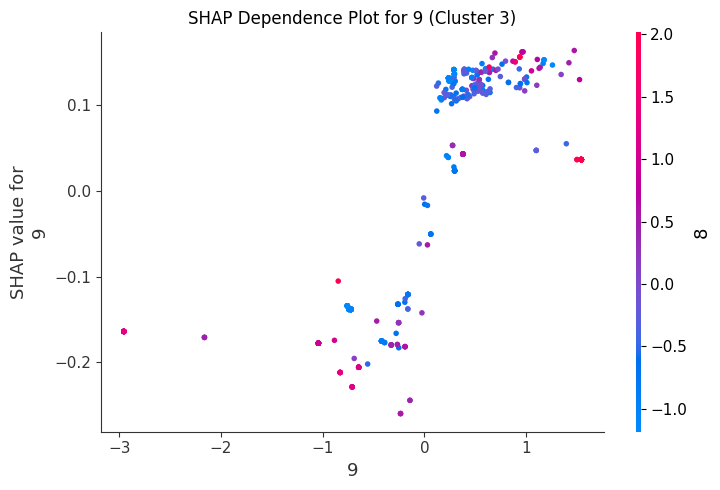

<Figure size 1000x800 with 0 Axes>

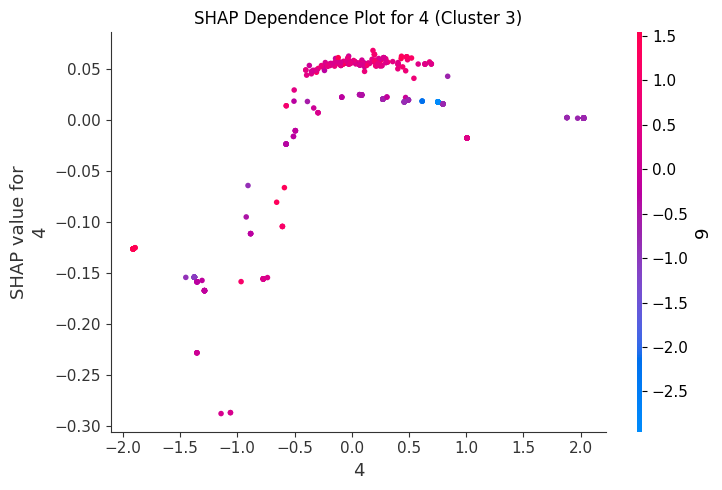

<Figure size 1000x800 with 0 Axes>

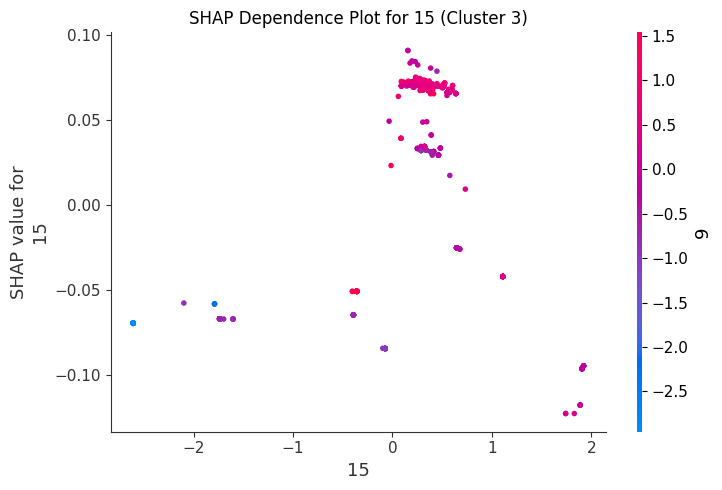

In [10]:
# Select important features for dependence plots
important_features = importance_df['Feature'][:3].tolist()  # Top 3 features

# Create dependence plots
for feature in important_features:
    plt.figure(figsize=(10, 8))
    feature_idx = list(X_ddr_aglo.columns).index(feature)
    
    # For the dominant cluster (Cluster 3 in your case)
    shap.dependence_plot(
        feature_idx, 
        shap_values[3], 
        X_scaled,
        feature_names=X_ddr_aglo.columns,
        show=False
    )
    plt.title(f'SHAP Dependence Plot for {feature} (Cluster 3)')
    plt.tight_layout()
    plt.show()
